In [2]:
from IPython.display import display, Math

In [3]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

Ao longo desta ficha prática é dito várias vezes para referir ao problema 9 da aula teórica para as condições. O problema 9 tem as seguintes condições:

- A massa do ciclista-bicicleta é de 75 kg
- O coeficiente de resistência $\mu$ de um piso liso de alcatrão é de 0.004
- O coeficiente de resistência do ar é $C_\text{res} = 0.9$
- A área frontal do ciclista-bicicleta é de $A = 0.30 \; m^2$
- A densidade do ar é $\rho_\text{ar} = 1.225 \; \text{kg/m}^3$

In [4]:
g = 9.8 # Aceleração gravítica na terra

mu = 0.004 # Coeficiente de resistência do alcatrão
rho_ar = 1.225 # Densidade do ar
A = 0.3 # Área frontal do ciclista-bicicleta
m = 75 # Massa do ciclista-bicicleta
C_res = 0.9 # Coeficiente de resistência do ar

# Exercício 1

Determine a evolução temporal da velocidade de um ciclista, se este produzir continuamente a potência de 0.4 cv e partir com um empurrão de 1 m/s?

In [5]:
# A unidade SI de potência é o watt, logo precisamos de
# converter de cavalos para watts
p_ciclista = 0.4 * 735.49875

## Parte A

Qual a sua velocidade terminal?

A velocidade terminal do ciclista é a velocidade máxima que o ciclista atinge, logo se soubermos como a velocidade varia ao longo do tempo podemos a calcular, para isto podemos usar o método de Euler, mas primeiro precisamos de saber como a aceleração varia.

A aceleração pode ser calculada dividindo a força pela massa, nós sabemos as forças aplicadas e sabemos que $F = \sum_i F_i$ logo podemos calcular a aceleração como $a = \sum_i \frac{F_i}{m}$.

Começamos por calcular a aceleração causada pela potência do ciclista, esta pode ser obtida dividindo a potência pela massa e velocidade, isto porque a potência é definida como:

$$
P_\text{cicliscta} = F_\text{cicliscta} \cdot v = ma_\text{potência} \cdot v \Leftrightarrow \frac{P_\text{cicliscta}}{mv} = a_\text{potência}
$$

De seguida calculamos a aceleração pela resistência do ar, como a resistência do ar tem sentido contrário ao do referencial precisa de ser negada:

$$
F_\text{ar} = - \frac{C_\text{res}}{2} \, A \, \rho_\text{ar} \, v^2
\Leftrightarrow a_\text{ar} = - \frac{C_\text{res}}{2m} \, A \, \rho_\text{ar} \, v^2
$$

Finalmente obtemos a aceleração do atrito com o piso, mais uma vez o sentido é contrário ao referencial logo a força tem de ser negada:

$$
F_\text{atrito} = - \mu \, g \, m
\Leftrightarrow a_\text{atrito} = - \mu \, g
$$

Ficando assim com a aceleração:

$$
a = 
\frac{P_\text{cicliscta}}{m v}
- \frac{C_\text{res}}{2m}A\rho_\text{ar}v^2
- \mu g
$$

Podemos agora utilizar o método de Euler para obter os valores da aceleração e da velocidade:

In [5]:
# Parâmetros
dt = 0.001
t0 = 0
tf = 200
x0 = 0
v0 = 1

# Esta função calcula a aceleração a partir da velocidade atual do ciclista
def accel(v):
    # Aceleração pela potência do ciclista
    accel_p = p_ciclista/(m * v)
    # Aceleração pela resistência do ar
    accel_res = -C_res/(2*m) * A * rho_ar * v**2
    # Aceleração pelo atrito
    accel_atrito = - mu * g
    # Aceleração total
    return accel_p + accel_res + accel_atrito

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

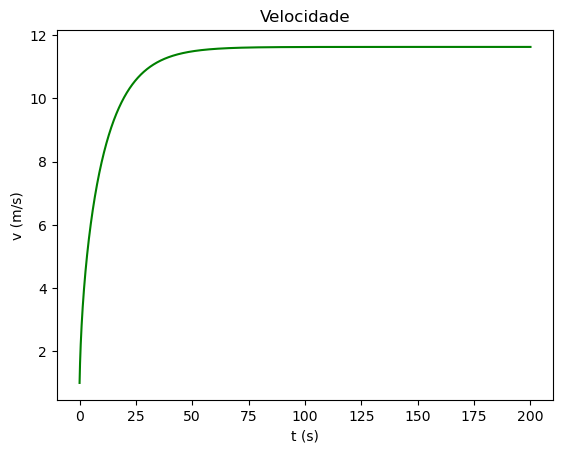

In [6]:
plt.plot(t, v, "g")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidade")
plt.show()

In [7]:
idx = v.argmax()
vT = v[idx]

In [8]:
display(Math(r'v_T = {:.8f} \; \text{{m/s}}'.format(vT)))

<IPython.core.display.Math object>

## Parte B

Ao fim de quanto tempo atinge 90% da sua velocidade terminal?

Agora que já sabemos a velocidade terminal para determinar o instante em que esta atinge 90% do seu total, podemos subtrair os 90% da velocidade terminal a velocidade e determinar o zero desta

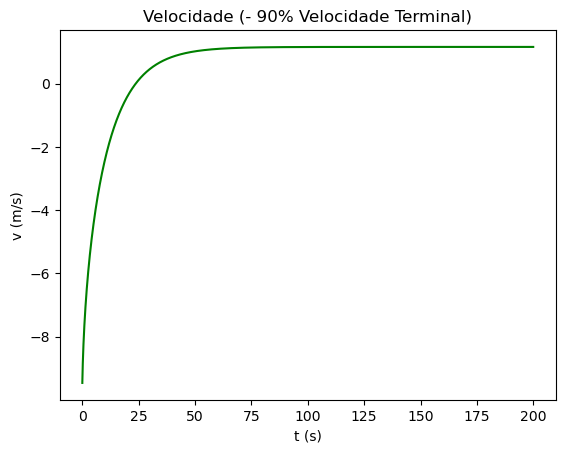

In [9]:
plt.plot(t, v - 0.9 * vT, "g")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidade (- 90% Velocidade Terminal)")
plt.show()

In [10]:
for i in range(n):
  # Subtrair 90% da velocidade terminal a velocidade
  scaledV0 = v[i] - vT * 0.9
  scaledV1 = v[i + 1] - vT * 0.9
  # Procurar os zeros com a velocidade modificada
  if scaledV0 == 0 or scaledV0 * scaledV1 < 0:
    idx = i
    break

v90 = v[idx]
t90 = t[idx]

In [11]:
display(Math(r'v_{{0.9}} = {:.8f} \; \text{{m/s}}'.format(v90)))
display(Math(r't_{{0.9}} = {:.8f} \; \text{{s}}'.format(t90)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Parte C

Quanto tempo leva a percorrer 2 km?

Tal como na última alínea podemos utilizar o mesmo método de subtrair 2km a posição e encontrar o zero.

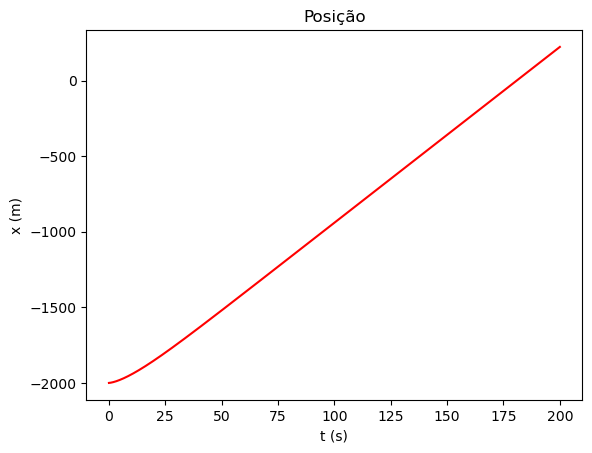

In [12]:
plt.plot(t, x - 2000, "r")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.title("Posição")
plt.show()

In [13]:
for i in range(n):
  # Subtrair 2km a posição
  scaledX0 = x[i] - 2000
  scaledX1 = x[i + 1] - 2000
  # Procurar os zeros com a posição modificada
  if scaledX0 == 0 or scaledX0 * scaledX1 < 0:
    idx = i
    break

x2000 = x[idx]
t2000 = t[idx]

In [14]:
display(Math(r'x_{{2000}} = {:.8f} \; \text{{m}}'.format(x2000)))
display(Math(r't_{{2000}} = {:.8f} \; \text{{s}}'.format(t2000)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Parte D

O ciclista do problema anterior segue logo atrás de um carro com carenagem aerodinâmica, tal que a força de resistência do ar experimentada pelo ciclista é reduzida por 99%.

Qual a sua velocidade terminal agora?

Podemos resolver exatamente como na alínea a) só precisamos de multiplicar a aceleração pela resistência do ar por $(1 - 0.99) = 0.01$, pois esta foi atenuada por 99%.

In [15]:
# Esta função calcula a aceleração a partir da velocidade atual do ciclista
def accel(v):
    # Aceleração pela potência do ciclista
    accel_p = p_ciclista/(m * v)
    # Aceleração pela resistência do ar
    # Multiplicar por (1 - 0.99) = 0.01 pois a força está atenuada
    accel_res = -C_res/(2*m) * A * rho_ar * v**2 * 0.01
    # Aceleração pelo atrito
    accel_atrito = - mu * g
    # Aceleração total
    return accel_p + accel_res + accel_atrito

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

In [16]:
idx = v.argmax()
vT99 = v[idx]

In [17]:
display(Math(r'v_T = {:.8f} \; \text{{m/s}}'.format(vT99)))

<IPython.core.display.Math object>

# Exercício 2

O ciclista sobe uma colina com uma inclinação de 5°.

As forças aplicadas na bicicleta são quase idênticas as do último exercício, com a exceção do peso que agora também contribui para o movimento e o atrito que como depende da normal e a normal tem a mesma magnitude do componente vertical do peso vai ser alterada.

A intensidade da força do peso no movimento do ciclista é de $P\sin(5^\circ)$, onde $P$ é a força do peso total que pode-se calculada como $-mg$ (a força é negativa no referencial utilizado).

A intensidade do atrito pode ser calculado por $\mu \, \left\lvert \vec{N} \right\rvert$, $\left\lvert \vec{N} \right\rvert$ vai ser igual a $P\cos(5^\circ)$ pois este é o componente vertical do peso.

In [14]:
# Parâmetros
dt = 0.001
t0 = 0
tf = 500
x0 = 0
v0 = 1

# Inclinação em radianos
incl = np.radians(5)

# Esta função calcula a aceleração a partir da velocidade atual do ciclista
def accel(v):
    # Aceleração pela potência do ciclista
    accel_p = p_ciclista/(m * v)
    # Aceleração pela resistência do ar
    accel_res = -C_res/(2*m) * A * rho_ar * v**2
    # Aceleração pelo atrito
    accel_atrito = - mu * np.cos(incl) * g
    # Aceleração pelo peso
    accel_peso = - np.sin(incl) * g
    # Aceleração total
    return accel_p + accel_res + accel_atrito + accel_peso

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

## Parte A

Quanto tempo demora a percorrer 2 km?

Mais uma vez podemos subtrair 2km a posição e encontrar o zero.

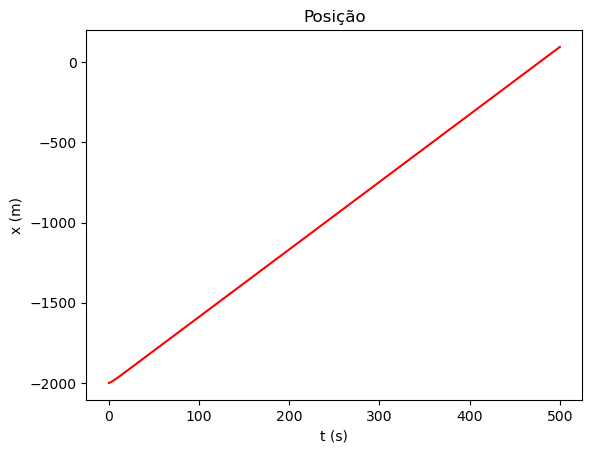

In [15]:
plt.plot(t, x - 2000, "r")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.title("Posição")
plt.show()

In [16]:
for i in range(n):
  # Subtrair 2km a posição
  scaledX0 = x[i] - 2000
  scaledX1 = x[i + 1] - 2000
  # Procurar os zeros com a posição modificada
  if scaledX0 == 0 or scaledX0 * scaledX1 < 0:
    idx = i
    break

x2000 = x[idx]
t2000 = t[idx]

In [17]:
display(Math(r'x_{{2000}} = {:.8f} \; \text{{m}}'.format(x2000)))
display(Math(r't_{{2000}} = {:.8f} \; \text{{s}}'.format(t2000)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Parte B

Qual a sua velocidade terminal?

Calculamos o máximo da velocidade para obter a velocidade terminal.

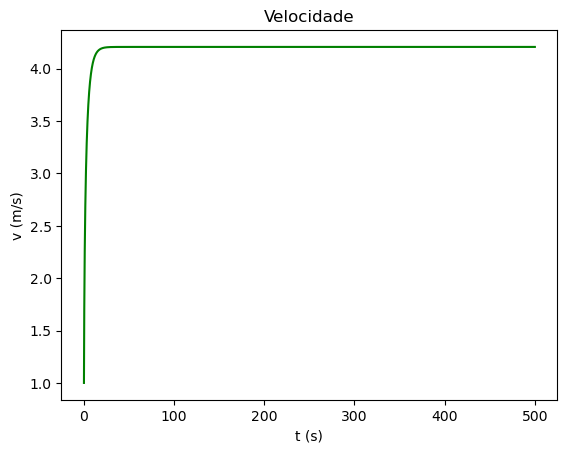

In [18]:
plt.plot(t, v, "g")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidade")
plt.show()

In [19]:
idx = v.argmax()
vT = v[idx]

In [20]:
display(Math(r'v_T = {:.8f} \; \text{{m/s}}'.format(vT)))

<IPython.core.display.Math object>

# Exercício 3

Muitos ciclistas amadores conduzem com o tronco levantado. Esta posição
aumenta a área de varrimento para o dobro.

## Parte A

Calcule a potência a desenvolver pelo ciclista se a velocidade for 30 km/h.

A potência é dada por $F \cdot v$, logo para calcular a potência necessária para 30 km/h basta calcularmos as forças que atuam no ciclista e multiplicar pela velocidade.

As forças que atuam no ciclista são as mesmas do exercício 1, exceto a potência:

$$
F = \frac{C_\text{res}}{2} \, A \, \rho_\text{ar} \, v^2 + \mu \, m \, g
$$

Logo a potência é dada por:

$$
P = \left( \frac{C_\text{res}}{2} \, A \, \rho_\text{ar} \, v^2 + \mu \, m \, g \right) v
$$

A velocidade tem primeiro de ser convertida para m/s:

$$
30 \; \text{km/h} = \frac{30 \times 1000}{3600} = \frac{25}{3} \; \text{m/s}
$$

Substituindo:



$$
\begin{align*}
P &= \left(
\frac{0.9}{2} \times 0.30 \times 1.225 \times \left( \frac{25}{3} \right)^2
+ 0.004 \times 75 \times 9.8
\right) \times \left( \frac{25}{3} \right) \\
&= \left( 11.484375 + 2.94 \right) \times \left( \frac{25}{3} \right)
= 120.203125
\end{align*}
$$

Ou calculando utilizando python:

In [25]:
v = (30 * 1000) / 3600

forca_res = C_res/2 * A * rho_ar * v**2
forca_atrito = + mu * g * m

potencia = (forca_res + forca_atrito) * v

In [26]:
display(Math(r'P = {:.8f} \; \text{{W}}'.format(potencia)))

<IPython.core.display.Math object>

## Parte B

E se a velocidade for de 40 km/h, qual a potência desenvolvida pelo ciclista?

O processo é o mesmo, começamos por converter a velocidade de km/h para m/s:

$$
40 \; \text{km/h} = \frac{40 \times 1000}{3600} = \frac{100}{9} \; \text{m/s}
$$

Substituindo:

$$
\begin{align*}
P &= \left(
\frac{0.9}{2} \times 0.30 \times 1.225 \times \left( \frac{100}{9} \right)^2
+ 0.004 \times 75 \times 9.8
\right) \times \left( \frac{100}{9} \right) \\
&\approx \left( 20.41666667 + 2.94 \right) \times \left( \frac{100}{9} \right)
\approx 259.5185186
\end{align*}
$$

Utilizando python:

In [27]:
v = (40 * 1000) / 3600

forca_res = C_res/2 * A * rho_ar * v**2
forca_atrito = + mu * g * m

potencia = (forca_res + forca_atrito) * v

In [28]:
display(Math(r'P = {:.8f} \; \text{{W}}'.format(potencia)))

<IPython.core.display.Math object>